[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/SemesterProject/DataPreparation.ipynb)

# Data Preparation for Semester Project

This script uses data obtained from [NOAA's Global Historic Climatology Network (GHCN)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) for the [Dale Enterprise, VA (USC00442208)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00442208/detail) location. 

Daily minimum (TMIN) and maximum (TMAX) values were downloaded. 

The unit is degrees Fahrenheit. 

Missing values are left EMPTY in CSV.


Documentation and information about quality control for this data can be found at [GHCN](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily). 

To facilitate data analysis TMIN and TMAX were separated into files and the data was pivotet (Rows = (Month, Day), Columns = Year).


The processed files are saved and uploaded to my [GitHub](https://github.com/TobGerken/ISAT300/tree/main/SemesterProject):

**File for TMAX**: `DaleEnterprise_TMAX_20221023_ByDay.csv`

**File for TMIN**: `DaleEnterprise_TMIN_20221023_ByDay.csv`



In [1]:
# running this will import pandas and numpy.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We read in the data and show the first few rows 
DaleEnterPriseData = 'https://raw.githubusercontent.com/TobGerken/ISAT300/main/SemesterProject/DaleEnterprise_TMINTMAXTOBS_20221023.csv'

df= pd.read_csv(DaleEnterPriseData)
print(df.shape)
df.head()

(47029, 6)


,STATION,NAME,DATE,TMAX,TMIN,TOBS
0,USC00442208,"DALE ENTERPRISE, VA US",1893-02-28,50.0,30.0,NaN
1,USC00442208,"DALE ENTERPRISE, VA US",1893-03-01,52.0,25.0,NaN
2,USC00442208,"DALE ENTERPRISE, VA US",1893-03-02,58.0,26.0,NaN
3,USC00442208,"DALE ENTERPRISE, VA US",1893-03-03,52.0,30.0,NaN
4,USC00442208,"DALE ENTERPRISE, VA US",1893-03-04,59.0,19.0,NaN


In [3]:
# You can see that there are missing values in the file because TMAX and TMIN have fewer non-null values than the DATE column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47029 entries, 0 to 47028
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  47029 non-null  object 
 1   NAME     47029 non-null  object 
 2   DATE     47029 non-null  object 
 3   TMAX     46898 non-null  float64
 4   TMIN     46838 non-null  float64
 5   TOBS     43912 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.2+ MB


In [4]:
# We can also look at a few statistics 
df.describe()

,TMAX,TMIN,TOBS
count,46898.000000,46838.000000,43912.000000
mean,65.497697,41.394210,54.772796
std,17.986691,16.460113,17.864659
min,0.000000,-25.000000,-60.000000
25%,51.000000,29.000000,40.000000
50%,68.000000,42.000000,57.000000
75%,81.000000,56.000000,70.000000
max,105.000000,90.000000,101.000000


The cells below translate the `DATE` column into something that python understands as a date. They might look the same when printed on screen, but they have different data-types. `DATE` is a `string Object` and `DateObject` is a of type `datetime`!

In [5]:
# Convert DATE to datetime and extract Month, Day, Year
df['DateObject']=pd.to_datetime(df['DATE'], format = 'mixed')
df['Month'] = df['DateObject'].dt.month
df['Day']= df['DateObject'].dt.day
df['Year']= df['DateObject'].dt.year
# this line removes all Feb 29 to have 365 days/year consistently.
df=df[((df['Month']==2) & (df['Day']==29)) == False]
# show object types for DATA and DateObject
print(df[['DATE', 'DateObject']].dtypes)
df.head()


DATE                  object
DateObject    datetime64[ns]
dtype: object


,STATION,NAME,DATE,TMAX,TMIN,TOBS,DateObject,Month,Day,Year
0,USC00442208,"DALE ENTERPRISE, VA US",1893-02-28,50.0,30.0,NaN,1893-02-28,2,28,1893
1,USC00442208,"DALE ENTERPRISE, VA US",1893-03-01,52.0,25.0,NaN,1893-03-01,3,1,1893
2,USC00442208,"DALE ENTERPRISE, VA US",1893-03-02,58.0,26.0,NaN,1893-03-02,3,2,1893
3,USC00442208,"DALE ENTERPRISE, VA US",1893-03-03,52.0,30.0,NaN,1893-03-03,3,3,1893
4,USC00442208,"DALE ENTERPRISE, VA US",1893-03-04,59.0,19.0,NaN,1893-03-04,3,4,1893


<Axes: xlabel='Year', ylabel='Fahrenheit'>

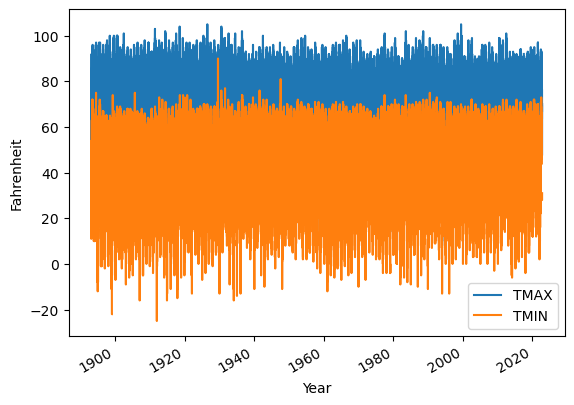

In [6]:
# This is how the data looks plotted. Not very useful as is
df[['DateObject','TMAX','TMIN']].plot(x='DateObject', ylabel = 'Fahrenheit', xlabel='Year')


The below two cells pivot the data, which means I am reshaping the data to have one row day in the year and then each year as a column. 

In [7]:
df_max= df.pivot(index='Year', columns=['Month', 'Day'], values='TMAX')
df_min= df.pivot(index='Year', columns=['Month', 'Day'], values='TMIN')

In [8]:
df_max=df_max.T
df_min=df_min.T

In [9]:
# Exxample of the result
df_max

Year       1893  1894  1895  1896  1897  1898  1899  1900  1901  1902  ...  \
Month Day                                                              ...   
2     28   50.0  50.0  57.0  55.0  38.0  38.0  51.0  30.0  48.0  65.0  ...   
3     1    52.0  53.0  68.0  52.0  45.0  45.0  58.0  52.0  50.0  63.0  ...   
      2    58.0  54.0  38.0  39.0  64.0  42.0  65.0  48.0  60.0  53.0  ...   
      3    52.0  57.0  50.0  44.0  67.0  38.0  53.0  46.0  60.0  42.0  ...   
      4    59.0  60.0  52.0  45.0  53.0  38.0  67.0  52.0  58.0  32.0  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2     23    NaN  37.0  36.0  61.0  49.0  39.0  46.0  53.0  29.0  43.0  ...   
      24    NaN  20.0  40.0  62.0  42.0  50.0  41.0  48.0  35.0  48.0  ...   
      25    NaN  28.0  55.0  35.0  46.0  42.0  42.0  26.0  45.0  43.0  ...   
      26    NaN  40.0  50.0  55.0  35.0  38.0  38.0  26.0  48.0  55.0  ...   
      27    NaN  46.0  55.0  58.0  30.0  30.0  50.0  33.0  40.0  52.0  ...   

Year       2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
Month Day                                                              
2     28   51.0  40.0  32.0  48.0  50.0  56.0  53.0  37.0  59.0  54.0  
3     1    42.0  32.0  29.0  60.0  59.0  60.0  52.0  38.0  55.0  50.0  
      2    38.0  50.0  35.0  65.0  69.0  53.0  36.0  54.0  54.0   NaN  
      3    40.0  60.0  47.0  54.0  56.0  45.0  37.0  61.0  45.0  67.0  
      4    40.0  35.0  39.0  40.0  38.0  50.0  34.0  65.0  58.0  62.0  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2     23   33.0  61.0  33.0  47.0  61.0  60.0  47.0  52.0  49.0  59.0  
      24   50.0  66.0  35.0  41.0  74.0  59.0  42.0  59.0  55.0  72.0  
      25   51.0  45.0  26.0  45.0  74.0  59.0  61.0  55.0  64.0  46.0  
      26   42.0  41.0  37.0  51.0  63.0  60.0  48.0  64.0  55.0   NaN  
      27   37.0  36.0  32.0  37.0  50.0  50.0  58.0  52.0  47.0  44.0  

[365 rows x 130 columns]

In [10]:
# I am now just sorting the data to make sure that we start with January 1st and not Feb 28. 
df_max=df_max.sort_values(['Month', 'Day'])
df_min=df_min.sort_values(['Month', 'Day'])

In [11]:
# Reformatted data is written to CSV File
df_max.to_csv('./DaleEnterprise_TMAX_20221023_ByDay.csv')
df_min.to_csv('./DaleEnterprise_TMIN_20221023_ByDay.csv')

### Some figures used in class below

Figures are mostly used to show the importance of variability and to look for change. 

3.528154150375576e-07
0.0007664181127955563


Text(1900, 45, 'Slope: 0.196 F/decade')

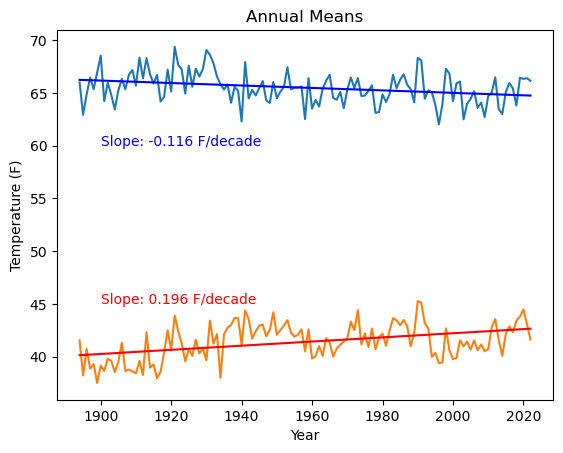

In [12]:
from scipy.stats import linregress

x = np.array(df_min.columns[1:])
yMin = df_min.mean().iloc[1::]
yMax = df_max.mean().iloc[1::]

slopeMin, interceptMin, r_value, p_valueMin, std_err = linregress(x, yMin)
slopeMax, interceptMax, r_value, p_valueMax, std_err = linregress(x, yMax)
print(p_valueMin)
print(p_valueMax)

df_max.mean().iloc[1::].plot()
df_min.mean().iloc[1::].plot(ylabel = 'Temperature (F)', title='Annual Means')
plt.plot(x, interceptMin + slopeMin*x, 'r')
plt.plot(x, interceptMax + slopeMax*x, 'b')
plt.text(1900, 60, 'Slope: {} F/decade'.format((slopeMax*10).round(3)), color = 'b')
plt.text(1900, 45, 'Slope: {} F/decade'.format((slopeMin*10).round(3)), color = 'r')


<Axes: xlabel='Month,Day'>

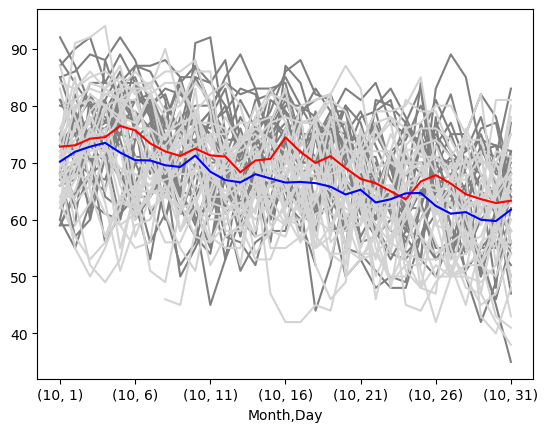

In [13]:
ax1 = df_max.loc[[(10)]][range(1900,1930)].plot(color='grey',legend=None)
df_max.loc[[(10)]][range(1990,2020)].plot(color='lightgrey',legend=None, ax = ax1)
df_max.loc[[(10)]][range(1900,1930)].mean(axis=1).plot(color='r', ax = ax1)
df_max.loc[[(10)]][range(1990,2020)].mean(axis=1).plot(color='b', ax = ax1)


<Axes: xlabel='Month,Day'>

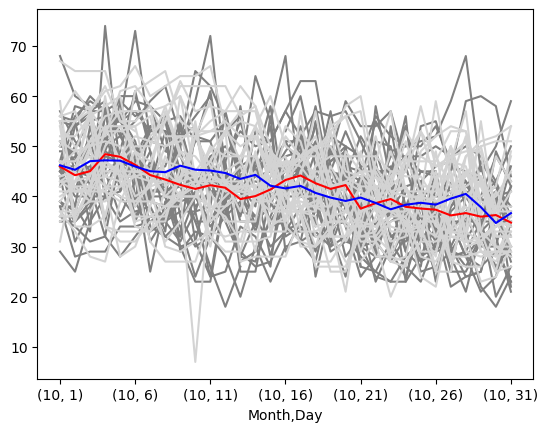

In [14]:
ax1 = df_min.loc[[(10)]][range(1900,1930)].plot(color='grey',legend=None)
df_min.loc[[(10)]][range(1990,2020)].plot(color='lightgrey',legend=None, ax = ax1)
df_min.loc[[(10)]][range(1900,1930)].mean(axis=1).plot(color='r', ax = ax1)
df_min.loc[[(10)]][range(1990,2020)].mean(axis=1).plot(color='b', ax = ax1)

Text(1, 95, '2000')

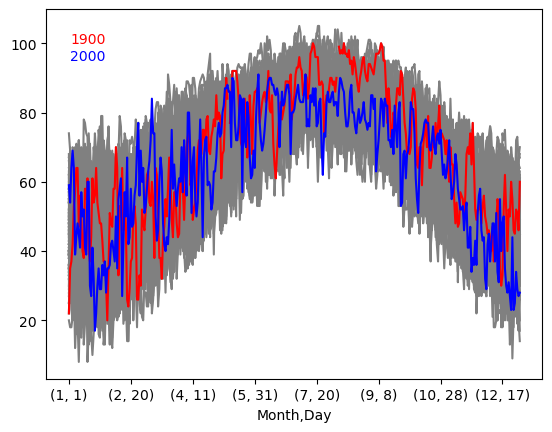

In [15]:
ax1 = df_max[range(1900,2000)].plot(color='grey',legend=None)
ax1 = df_max[1900].plot(color='r')
ax1 = df_max[2000].plot(color='b')
plt.text(1,100, '1900', color ='r')
plt.text(1,95, '2000', color ='b')


In [16]:
# Importing library
import scipy.stats as stats
   
# Performing the paired sample t-test
stats.ttest_rel(df_max[1900], df_max[2000])

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [17]:
print('1900: ', df_max[1900].mean(), '; 2000: ', df_max[2000].mean())
stats.ttest_rel(df_max[1900], df_max[2000],nan_policy = 'omit')


1900:  68.53719008264463 ; 2000:  64.2027397260274


TtestResult(statistic=5.80236408648617, pvalue=1.4282762335172277e-08, df=362)

In [18]:
stats.ttest_rel(df_max[1900], df_max[2001],nan_policy = 'omit')

TtestResult(statistic=3.860586389799323, pvalue=0.0001339489178981368, df=362)

Text(1, 95, '1998')

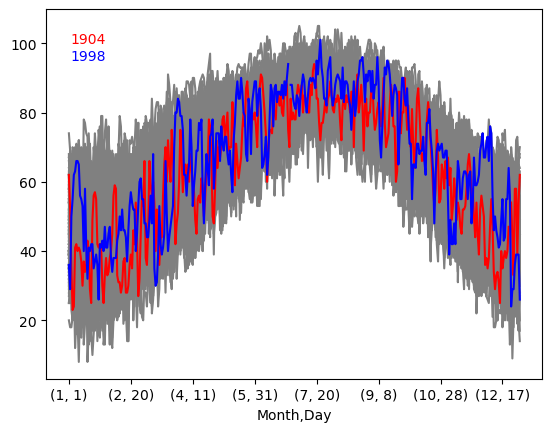

In [22]:
ax1 = df_max[range(1904,2004)].plot(color='grey',legend=None)
ax1 = df_max[1904].plot(color='r')
ax1 = df_max[1998].plot(color='b')
plt.text(1,100, '1904', color ='r')
plt.text(1,95, '1998', color ='b')

In [23]:
print('1905: ', df_max[1904].mean(),  '; 1998: ', df_max[1998].mean())
stats.ttest_rel(df_max[1904], df_max[1998],nan_policy = 'omit')

1905:  63.43681318681319 ; 1998:  67.29945054945055


TtestResult(statistic=-5.683678184534523, pvalue=2.7155943865861146e-08, df=362)

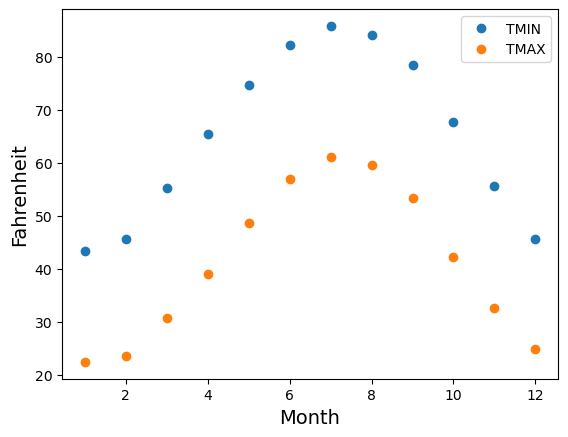

In [47]:
# Here I am averaging the data from daily to monthly and create similar dataframes TMIN/TMAX
dfMonth=df.resample('M', on='DateObject').mean()

dfMonthTMIN=pd.DataFrame(dfMonth['TMIN'].iloc[11:1547].values.reshape(128,12), columns = range(1,13), index = range(1894,2022))
dfMonthTMAX=pd.DataFrame(dfMonth['TMAX'].iloc[11:1547].values.reshape(128,12), columns = range(1,13), index = range(1894,2022))
# This shows nicely the annual cycle of temperatures at the site 
dfMonthTMAX.mean().plot(marker = 'o', linestyle='')
dfMonthTMIN.mean().plot(marker = 'o', linestyle='')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Fahrenheit', fontsize = 14)
plt.legend(['TMIN', 'TMAX'])